[View in Colaboratory](https://colab.research.google.com/github/ayush3899/Neural_Network-/blob/master/IMDBdataset.ipynb)

In [1]:
import tensorflow as tf
from tensorflow import keras

import numpy as np

print(tf.__version__)

1.12.0-rc1


In [0]:
imdb = keras.datasets.imdb

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

In [0]:
# The argument num_words=10000 keeps the top 10,000 most frequently 
# occurring words in the training data. The rare words are 
# discarded to keep the size of the data manageable.

In [4]:
# explore the data
print("Training entries: {}, labels: {}".format(len(train_data), len(train_labels)))

Training entries: 25000, labels: 25000


In [5]:
# The text of reviews have been converted to integers, 
# where each integer represents a specific word in a dictionary

print(train_data[0])

[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]


In [6]:
# Movie reviews may be different lengths. The below code shows 
# the number of words in the first and second reviews. 
# Since inputs to a neural network must be the same length, 
# we'll need to resolve this later.

len(train_data[0]),len(train_data[1])

(218, 189)

In [0]:
# A dictionary mapping words to an integer index
word_index = imdb.get_word_index()

# The first indices are reserved
word_index = {k:(v+3) for k,v in word_index.items()} 
word_index["<PAD>"] = 0
word_index["<START>"] = 1
word_index["<UNK>"] = 2  # unknown
word_index["<UNUSED>"] = 3

reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

def decode_review(text):
    return ' '.join([reverse_word_index.get(i, '?') for i in text])

In [10]:
decode_review(train_data[0])


"<START> this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert <UNK> is an amazing actor and now the same being director <UNK> father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for <UNK> and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also <UNK> to the two little boy's that played the <UNK> of norman and paul they were just brilliant children are often left out of the <UNK> list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for wh

In [0]:
train_data = keras.preprocessing.sequence.pad_sequences(train_data,
                                                        value=word_index["<PAD>"],
                                                        padding='post',
                                                        maxlen=256)

test_data = keras.preprocessing.sequence.pad_sequences(test_data,
                                                       value=word_index["<PAD>"],
                                                       padding='post',
                                                       maxlen=256)

In [12]:
len(train_data[0]), len(train_data[1])

(256, 256)

In [13]:
print(train_data[0])

[   1   14   22   16   43  530  973 1622 1385   65  458 4468   66 3941
    4  173   36  256    5   25  100   43  838  112   50  670    2    9
   35  480  284    5  150    4  172  112  167    2  336  385   39    4
  172 4536 1111   17  546   38   13  447    4  192   50   16    6  147
 2025   19   14   22    4 1920 4613  469    4   22   71   87   12   16
   43  530   38   76   15   13 1247    4   22   17  515   17   12   16
  626   18    2    5   62  386   12    8  316    8  106    5    4 2223
 5244   16  480   66 3785   33    4  130   12   16   38  619    5   25
  124   51   36  135   48   25 1415   33    6   22   12  215   28   77
   52    5   14  407   16   82    2    8    4  107  117 5952   15  256
    4    2    7 3766    5  723   36   71   43  530  476   26  400  317
   46    7    4    2 1029   13  104   88    4  381   15  297   98   32
 2071   56   26  141    6  194 7486   18    4  226   22   21  134  476
   26  480    5  144   30 5535   18   51   36   28  224   92   25  104
    4 

In [14]:
# input shape is the vocabulary count used for the movie reviews (10,000 words)
vocab_size = 10000

model = keras.Sequential()
model.add(keras.layers.Embedding(vocab_size, 16))
model.add(keras.layers.GlobalAveragePooling1D())
model.add(keras.layers.Dense(16, activation=tf.nn.relu))
model.add(keras.layers.Dense(1, activation=tf.nn.sigmoid))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 16)          160000    
_________________________________________________________________
global_average_pooling1d (Gl (None, 16)                0         
_________________________________________________________________
dense (Dense)                (None, 16)                272       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 17        
Total params: 160,289
Trainable params: 160,289
Non-trainable params: 0
_________________________________________________________________


In [0]:
model.compile(optimizer=tf.train.AdamOptimizer(),
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [0]:
# Create a validation set
x_val = train_data[:10000]
partial_x_train = train_data[10000:]

y_val = train_labels[:10000]
partial_y_train = train_labels[10000:]

In [17]:
#this is 40 iterations over all samples in the x_train nd 
# y_train tensors while training monitor the model's
# loss nd accuracy in thr 10000 samples from the validaton

history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=40,
                    batch_size=512,
                    validation_data=(x_val, y_val),
                    verbose=1)

Train on 15000 samples, validate on 10000 samples
Epoch 1/40
15000/15000 [==============================] - 1s 72us/step - loss: 0.6918 - acc: 0.5701 - val_loss: 0.6897 - val_acc: 0.6593
Epoch 2/40
15000/15000 [==============================] - 1s 59us/step - loss: 0.6851 - acc: 0.7558 - val_loss: 0.6804 - val_acc: 0.7450
Epoch 3/40
15000/15000 [==============================] - 1s 59us/step - loss: 0.6714 - acc: 0.7741 - val_loss: 0.6633 - val_acc: 0.7663
Epoch 4/40
15000/15000 [==============================] - 1s 59us/step - loss: 0.6472 - acc: 0.7767 - val_loss: 0.6368 - val_acc: 0.7758
Epoch 5/40
15000/15000 [==============================] - 1s 59us/step - loss: 0.6124 - acc: 0.8019 - val_loss: 0.5997 - val_acc: 0.7925
Epoch 6/40
15000/15000 [==============================] - 1s 60us/step - loss: 0.5687 - acc: 0.8183 - val_loss: 0.5576 - val_acc: 0.8041
Epoch 7/40
15000/15000 [==============================] - 1s 59us/step - loss: 0.5204 - acc: 0.8360 - val_loss: 0.5136 - val_acc

In [18]:
# print(partial_x_train.shape)
test_loss, test_acc = model.evaluate(test_data, test_labels)

print('Test accuracy:', test_acc)

25000/25000 [==============================] - 1s 36us/step
Test accuracy: 0.87248


In [19]:
res=model.evaluate(test_data,test_labels)
print(res)

25000/25000 [==============================] - 1s 35us/step
[0.3307067870044708, 0.87248]


In [20]:
# creat agraph of accuracy and loss over time 
history_dict = history.history
history_dict.keys()

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])

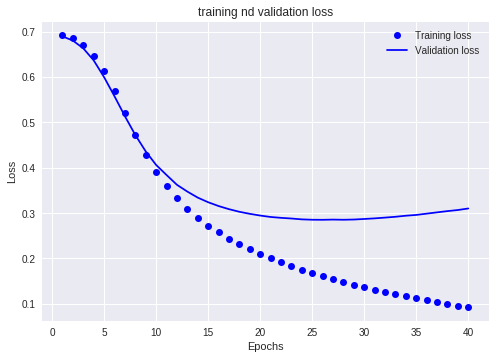

In [21]:
import matplotlib.pyplot as plt
acc=history.history['acc']
val_acc=history.history['val_acc']
loss=history.history['loss']
val_loss=history.history['val_loss']

gg=range(1,len(acc)+1)

plt.plot(gg,loss,'bo',label='Training loss')

plt.plot(gg,val_loss,'b',label='Validation loss')
plt.title('training nd validation loss')
plt.xlabel("Epochs")
plt.ylabel('Loss')
plt.legend()
plt.show()

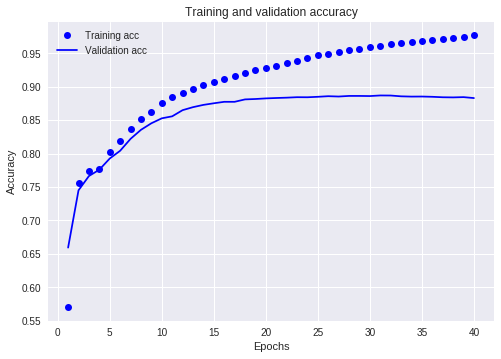

In [22]:
plt.clf()   # clear figure
acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']

plt.plot(gg, acc, 'bo', label='Training acc')
plt.plot(gg, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [23]:
#this is 40 iterations over all samples in the x_train nd 
# y_train tensors while training monitor the model's
# loss nd accuracy in thr 10000 samples from the validaton
# do same thing for 20 epochs
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=10,
                    batch_size=512,
                    validation_data=(x_val, y_val),
                    verbose=1)

Train on 15000 samples, validate on 10000 samples
Epoch 1/10
15000/15000 [==============================] - 1s 52us/step - loss: 0.0893 - acc: 0.9777 - val_loss: 0.3133 - val_acc: 0.8832
Epoch 2/10
15000/15000 [==============================] - 1s 52us/step - loss: 0.0857 - acc: 0.9791 - val_loss: 0.3174 - val_acc: 0.8821
Epoch 3/10
15000/15000 [==============================] - 1s 54us/step - loss: 0.0825 - acc: 0.9807 - val_loss: 0.3205 - val_acc: 0.8818
Epoch 4/10
15000/15000 [==============================] - 1s 59us/step - loss: 0.0795 - acc: 0.9811 - val_loss: 0.3242 - val_acc: 0.8817
Epoch 5/10
15000/15000 [==============================] - 1s 58us/step - loss: 0.0767 - acc: 0.9820 - val_loss: 0.3279 - val_acc: 0.8819
Epoch 6/10
15000/15000 [==============================] - 1s 59us/step - loss: 0.0737 - acc: 0.9833 - val_loss: 0.3321 - val_acc: 0.8798
Epoch 7/10
15000/15000 [==============================] - 1s 58us/step - loss: 0.0715 - acc: 0.9843 - val_loss: 0.3362 - val_acc

In [24]:
res=model.evaluate(test_data,test_labels)
print(res)

25000/25000 [==============================] - 1s 34us/step
[0.37377921827316285, 0.8672]


In [25]:
# creat agraph of accuracy and loss over time 
history_dict = history.history
history_dict.keys()

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])

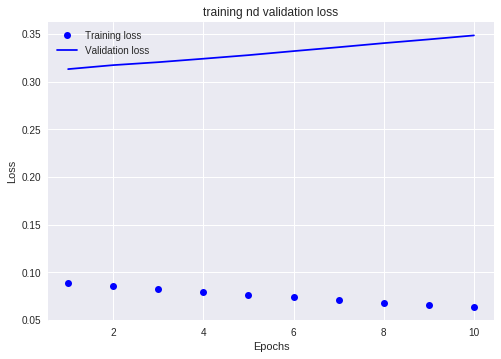

In [26]:
import matplotlib.pyplot as plt
acc=history.history['acc']
val_acc=history.history['val_acc']
loss=history.history['loss']
val_loss=history.history['val_loss']

gg=range(1,len(acc)+1)

plt.plot(gg,loss,'bo',label='Training loss')

plt.plot(gg,val_loss,'b',label='Validation loss')
plt.title('training nd validation loss')
plt.xlabel("Epochs")
plt.ylabel('Loss')
plt.legend()
plt.show()

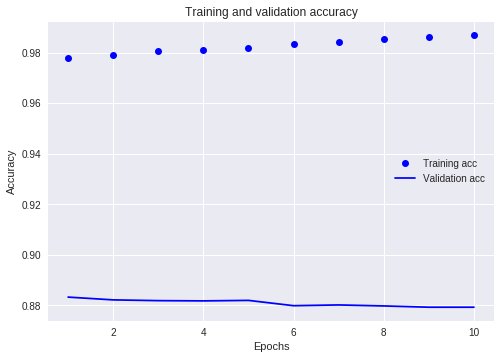

In [27]:
plt.clf()   # clear figure
acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']

plt.plot(gg, acc, 'bo', label='Training acc')
plt.plot(gg, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()